   x_coordinates  y_coordinates  cluster_labels
0           89.1           87.2               1
1           93.1           96.1               1
2           86.6           95.6               1
3           98.5           92.4               1
4           86.4           92.4               1


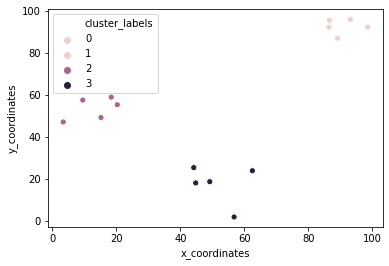

In [6]:
from scipy.cluster.hierarchy import linkage, fcluster, linkage
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd

x_coordinates=[89.1,93.1,86.6,98.5,86.4,9.5,15.2,3.4,
18.4,20.3,44.2,56.8,49.2,62.5,44.8]

y_coordinates=[87.2,96.1,95.6,92.4,92.4,57.7,49.4,
47.3,59.1,55.5,25.6,2.1,18.9, 24.1,18.3]

df=pd.DataFrame({'x_coordinates':x_coordinates,
'y_coordinates':y_coordinates})

#Z= linkage(df,'ward')
#Z= linkage(df,'single')
#Z= linkage(df,'complete')
Z= linkage(df,'centroid')
df['cluster_labels']=fcluster(Z,3,criterion='maxclust')
print(df.head(5))

sns.scatterplot(x='x_coordinates',y='y_coordinates', hue='cluster_labels', data=df)
plt.show()

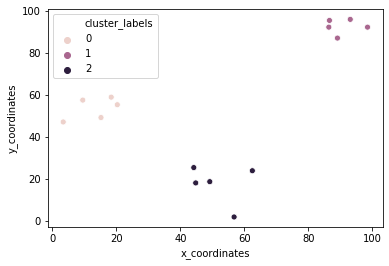

In [12]:
from scipy.cluster.vq import kmeans, vq
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd

import random
random.seed(1000,2000)

x_coordinates=[89.1,93.1,86.6,98.5,86.4,9.5,15.2,3.4,
18.4,20.3,44.2,56.8,49.2,62.5,44.8]

y_coordinates=[87.2,96.1,95.6,92.4,92.4,57.7,49.4,
47.3,59.1,55.5,25.6,2.1,18.9, 24.1,18.3]


df=pd.DataFrame({'x_coordinates':x_coordinates,
'y_coordinates':y_coordinates})

centroids, _=kmeans(df,3)
df['cluster_labels'], _= vq(df,centroids)

sns.scatterplot(x='x_coordinates',y='y_coordinates', hue='cluster_labels', data=df)
plt.show()

[2.72733941 0.54546788 1.63640365 1.63640365 1.09093577 1.63640365
 1.63640365 4.36374306 0.54546788 1.09093577 1.09093577 1.63640365
 2.72733941]


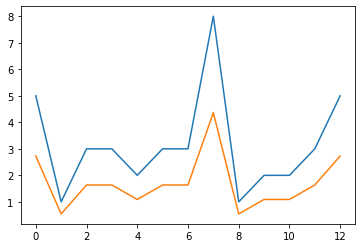

In [1]:
from scipy.cluster.vq import whiten
from matplotlib import pyplot as plt

data=[5,1,3,3,2,3,3,8,1,2,2,3,5]

scaled_data=whiten(data)
print(scaled_data)

plt.plot(data, label='original')
plt.plot(scaled_data,label='scaled')
plt.show()


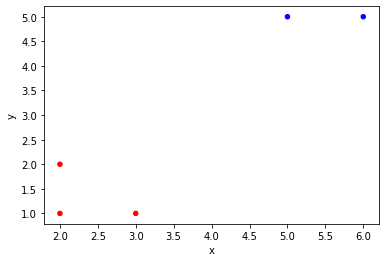

In [11]:
from matplotlib import pyplot as plt

df= pd.DataFrame({
'x':[2,3,5,6,2],
'y':[1,1,5,5,2],
'labels': ['A','A','B','B','A']
})

colors= {'A':'red','B':'blue'}

df.plot.scatter(
x='x',
y='y',
c=df['labels'].apply(lambda x: colors[x]))
plt.show()

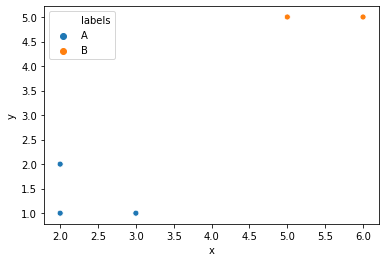

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

df= pd.DataFrame({
'x':[2,3,5,6,2],
'y':[1,1,5,5,2],
'labels': ['A','A','B','B','A']
})

sns.scatterplot(x='x',y='y', hue='labels', data=df)
plt.show()

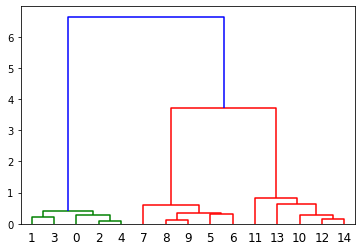

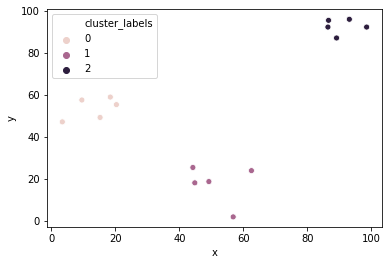

In [2]:
from scipy.cluster.vq import kmeans, vq, whiten
from scipy.cluster.hierarchy import linkage, fcluster,dendrogram
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd

import random
random.seed(1000,2000)

x=[89.1,93.1,86.6,98.5,86.4,9.5,15.2,3.4,
18.4,20.3,44.2,56.8,49.2,62.5,44.8]

y=[87.2,96.1,95.6,92.4,92.4,57.7,49.4,
47.3,59.1,55.5,25.6,2.1,18.9, 24.1,18.3]

x_whiten=whiten(x)
y_whiten=whiten(y)

df_whiten=pd.DataFrame({
    'x_whiten':x_whiten,
    'y_whiten':y_whiten
   
})

Z=linkage(df_whiten,
method='ward',
metric='euclidean'
)
dn=dendrogram(Z)
plt.show()

df=pd.DataFrame({'x':x,
'y':y})

centroids, _=kmeans(df,3)
df['cluster_labels'], _= vq(df,centroids)

sns.scatterplot(x='x',y='y', hue='cluster_labels', data=df)
plt.show()


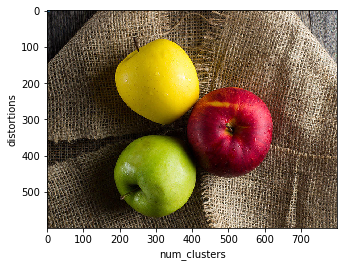

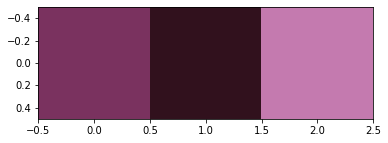

In [14]:
import matplotlib.image as img
from scipy.cluster.vq import kmeans, vq, whiten
import seaborn as sns, pandas as pd
from matplotlib import pyplot as plt
from PIL import Image

img_visual = Image.open("./apples.jpg")
plt.imshow(img_visual)

image=img.imread("./apples.jpg")
image.shape


r=[]
g=[]
b=[]

for row in image:
        for single_pixel in row:
            temp_r,temp_g,temp_b=single_pixel
            r.append(temp_r)
            g.append(temp_g)
            b.append(temp_b)
            
pixels=pd.DataFrame({
    'red':r,
    'blue':b,
    'green':g
})            

pixels['scaled_red']=whiten(pixels['red'])
pixels['scaled_blue']=whiten(pixels['blue'])
pixels['scaled_green']=whiten(pixels['green'])

num_clusters= range(1,6)

distortions=[]
for k in num_clusters:
    centroids, distortion = kmeans(pixels[['scaled_red','scaled_blue','scaled_green']],k)
    distortions.append(distortion)

elbow_plot_data= pd.DataFrame({'num_clusters':num_clusters,'distortions':distortions})

sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot_data)
plt.show()            

cluster_centers,distortions=kmeans(pixels[['scaled_red','scaled_blue','scaled_green']],3)

colors=[]

r_std,g_std,b_std = pixels[['red','blue','green']].std()

for cluster_center in cluster_centers:
        scaled_r,scaled_g,scaled_b=cluster_center
        colors.append((
            scaled_r * r_std/255,
            scaled_g * g_std/255,
            scaled_b * b_std/255
        ))
        
plt.imshow([colors])
plt.show()